In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('colisoes.csv')

In [95]:
df['media'] = (df['acumulado'] / df['collision']) + 1

In [96]:
df['log'] = df['collision'].apply(np.log2)

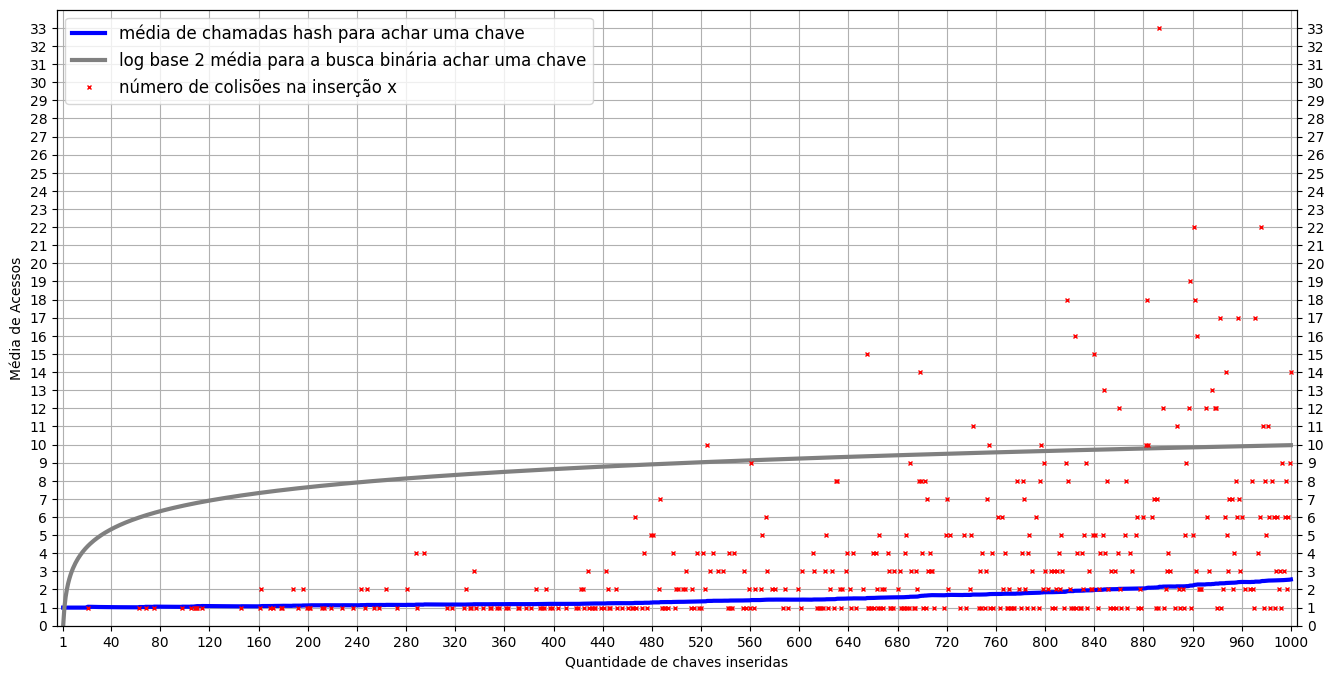

In [97]:
fig, ax1 = plt.subplots(figsize=(16, 8))

line1, = ax1.plot(df['collision'], df['media'], label='média de chamadas hash para achar uma chave', color='blue', linewidth=3) # , marker='o'
ax1.set_xlabel('Quantidade de chaves inseridas')
ax1.set_ylabel('Média de Acessos')
# ax1.tick_params(axis='y', labelcolor='blue')

line2, = ax1.plot(df['collision'],df['log'], label='log base 2 média para a busca binária achar uma chave', color='gray', linewidth=3)

ax1.set_xlim([1-5, df['collision'].max() + 5])
# ax1.set_ylim([0, max(df['media'].max(), df['log'].max())])
ax1.set_ylim([0, max(df['media'].max(), df['log'].max(),df['count'].max()) + 1])

ax2 = ax1.twinx()

line3, = ax2.plot(df.loc[(df['count'] != 0), 'collision'], df.loc[(df['count'] != 0), 'count'], label='número de colisões na inserção x', color='red', marker='x', ms=3.3, linestyle='None')
# ax2.set_ylabel('Values', color='red')
# ax2.tick_params(axis='y', labelcolor='red')

ax2.set_ylim([df['count'].min(), df['count'].max() + 1])

# ax3 = ax1.twinx()

# ax3.plot(df['collision'], df['count'], label='Values', color='red', linestyle='solid', linewidth=0.2)
# ax3.set_ylim([df['count'].min(), df['count'].max() + 2])
# ax3.set_yticks([])

x_values = np.linspace(df['collision'].min(), df['collision'].max(), num=26, dtype=int)
ax1.set_xticks(x_values)

y1_values = np.linspace(0, max(df['media'].max(), df['log'].max(),df['count'].max()), num=max(df['media'].max(), df['log'].max(),df['count'].max())+1, dtype=int)
ax1.set_yticks(y1_values)

# y2_values = np.linspace(df['count'].min(), df['count'].max(), num=20, dtype=int)
ax2.set_yticks(y1_values)

ax1.grid() # color='#7777FF'
# ax2.grid(color='#FF7777')

handles = [line1, line2, line3]
labels = [line1.get_label(), line2.get_label(), line3.get_label()]

ax1.legend(handles, labels,loc='upper left', fontsize='large')
plt.savefig('collisions-per-insertion.svg', format='svg')
plt.savefig('collisions-per-insertion.jpg')

plt.show()

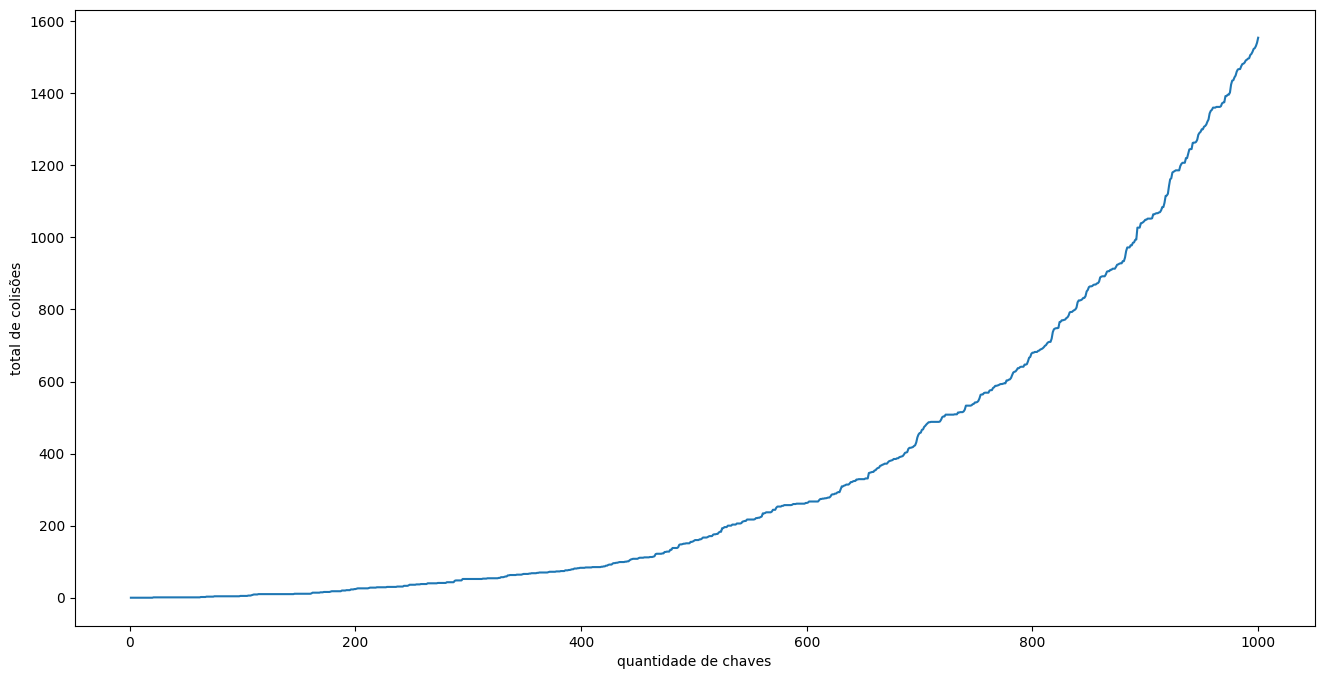

In [98]:
plt.figure(figsize=(16,8))

plt.plot(df['collision'],df['acumulado'])
plt.xlabel('quantidade de chaves')
plt.ylabel('total de colisões')

plt.show()

In [99]:
df['count'].sum()

np.int64(1554)

In [100]:
df['count'].describe()

count    1000.000000
mean        1.554000
std         3.210824
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        33.000000
Name: count, dtype: float64

In [101]:
df['media'].describe()

count    1000.000000
mean        1.468254
std         0.419335
min         1.000000
25%         1.143833
50%         1.316730
75%         1.723185
max         2.554000
Name: media, dtype: float64